<a href="https://colab.research.google.com/github/doc-city/diveintocode-ml/blob/circleci-project-setup/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

# Dataset preparation

In [3]:
# Download IMDB to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Defrost
!tar zxf aclImdb_v1.tar.gz
# aclImdb / train / unsup is unlabeled and removed
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

--2021-08-28 06:15:00--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  19.8MB/s    in 5.5s    

2021-08-28 06:15:05 (14.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [4]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# Display of correspondence between 0,1 of label and meaning
print(train_review.target_names)

['neg', 'pos']


In [5]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [6]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# Put together in a DataFrame
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [8]:
# Specify the range of n-gram to be used in ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# Problem 1 BOW Scratch Mounting

In [9]:
texts = ["This movie is SOOOO funny!!!",
     "What a movie! I never",
      "best movie ever!!!!! this movie"]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vc = CountVectorizer()
bow = (vc.fit_transform(texts)).toarray()

df = pd.DataFrame(bow, columns=vc.get_feature_names())
df

,best,ever,funny,is,movie,never,soooo,this,what
0,0,0,1,1,1,0,1,1,0
1,0,0,0,0,1,1,0,0,1
2,1,1,0,0,2,0,0,1,0


In [11]:
# Scratch mounting

alpha_text = "This movie is SOOOO funny!!!"
alpha_pattern = "\w+"  # \W is also an inverse, which means anything besides alphabet.
alpha_regex = re.compile(alpha_pattern)

all_alpha_matches = alpha_regex.findall(alpha_text)
print(all_alpha_matches)

['This', 'movie', 'is', 'SOOOO', 'funny']


In [12]:
s = "This movie is SOOOO funny!!!"

def sentence_split(text):
  #Lowercase processing
  text = text.lower()
  #cleaning
  regex = re.compile("\w+")
  text = regex.findall(text)
  #text = re.sub(r'!', "", text)
  #text = text.split(" ")
  return text

sentence_split(s)

['this', 'movie', 'is', 'soooo', 'funny']

In [13]:
text = "This movie is SOOOO funny!!!"

def n_gram(text, n):
  text = sentence_split(text)
  split_words = [text[i:i+n] for i in range(len(text)-n+1)]
  return [" ".join(words) for words in split_words]

print(n_gram(text, 2))
print(n_gram(text, 3))

['this movie', 'movie is', 'is soooo', 'soooo funny']
['this movie is', 'movie is soooo', 'is soooo funny']


In [14]:
def bag_of_word(texts, n):
  split_words_list = list(map(lambda x: n_gram(x, n), texts))
  bow = []
  for split_words in split_words_list:
    counter = Counter(split_words)
    bow.append(counter)

  df = pd.DataFrame(bow)
  df = df.fillna(0).astype(int)
  return df

display("Bow n_gram is 1",bag_of_word(texts, 1))
display("Bow n_gram is 2",bag_of_word(texts, 2))

'Bow n_gram is 1'

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,2,0,0,0,0,0,0,0,1,1


'Bow n_gram is 2'

,this movie,movie is,is soooo,soooo funny,what a,a movie,movie i,i never,best movie,movie ever,ever this
0,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1


# Problem 2 Calculation of TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
# Download Stopword for the first time
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [16]:
#Exclusion of tokens that appear less frequently

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


In [17]:
vc = CountVectorizer(token_pattern=r'\b\w+\b', stop_words=stop_words, max_features=5000)
x_train_bow = vc.fit_transform(x_train).toarray()
df = pd.DataFrame(x_train_bow, columns=vc.get_feature_names())
df.head()

,0,00,000,1,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,...,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,x,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# TF = IDF value calculation for IMDB movie review dataset

vec_tfidf = TfidfVectorizer(stop_words=stop_words, max_features=5000)
x_train_tfidf = vec_tfidf.fit_transform(x_train).toarray()
df = pd.DataFrame(x_train_tfidf, columns=vec_tfidf.get_feature_names())
df.head()

,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1971,1972,1973,1980,1980s,1983,1984,1987,1990,1993,1995,1996,1997,1999,1st,20,...,worth,worthless,worthwhile,worthy,would,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yard,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,young,younger,youth,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.054256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164505,0.0,0.0,0.136932,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.127480,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.085006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.104143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Problem 3 Learning using TF-IDF

In [19]:
# First of all, the baseline model

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
                     ("bow", CountVectorizer()),
                     ("tfidf", TfidfTransformer()),
                     ("classifier", RandomForestClassifier())
])

pipeline.fit(x_train, y_train)
pred = pipeline.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [20]:
# Observe the change in the correct answer rate depending on the maximum number of vocabulary

from tqdm import tqdm
max_features_pattern = [1000,2000,3000,4000,5000]

for max_features in tqdm(max_features_pattern):
  pipeline = Pipeline([
                      ("bow", CountVectorizer(max_features=max_features)),
                      ("tfidf", TfidfTransformer()),
                      ("classifier", RandomForestClassifier())
  ])

  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)
  print(f"max_features_pattern is {max_features} \n", classification_report(y_test, y_pred))

 20%|██        | 1/5 [01:37<06:30, 97.61s/it]

max_features_pattern is 1000 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     12500
           1       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



 40%|████      | 2/5 [03:10<04:44, 94.84s/it]

max_features_pattern is 2000 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     12500
           1       0.84      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



 60%|██████    | 3/5 [04:40<03:05, 92.69s/it]

max_features_pattern is 3000 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.84      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



 80%|████████  | 4/5 [06:08<01:30, 90.92s/it]

max_features_pattern is 4000 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



100%|██████████| 5/5 [07:33<00:00, 90.77s/it]

max_features_pattern is 5000 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.85      0.82      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [21]:
# Observe the change in the correct answer rate by inserting a stop word

from nltk.corpus import stopwords
stop_words = stopwords.words("english")

pipeline = Pipeline([
                    ("bow", CountVectorizer(stop_words=stop_words)),
                    ("tfidf", TfidfTransformer()),
                    ("classifier", RandomForestClassifier())
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [22]:
# Observe changes in the percentage of correct answers due to changes in the number of vocabulary

n_gram_pattern = [(1,1), (1,2), (2,2)]

for ngram_range in n_gram_pattern:
  pipeline = Pipeline([
                      ("bow", CountVectorizer(ngram_range=ngram_range)),
                      ("tfidf", TfidfTransformer()),
                      ("classifier", RandomForestClassifier())
  ])

  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)
  print(f"n_gram_pattern is {ngram_range} \n", classification_report(y_test, y_pred))

n_gram_pattern is (1, 1) 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.84      0.83      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

n_gram_pattern is (1, 2) 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     12500
           1       0.86      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

n_gram_pattern is (2, 2) 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84     12500
           1       0.85      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83    

# Problem 4 Scratch mounting of TF-IDF

In [23]:
texts = ["This movie is SOOOO funny!!!",
         "What a movie! I never",
         "best movie ever!!!!! this movie"]

In [24]:
vec_tfidf = TfidfVectorizer(stop_words=stop_words, norm=None)
texts_tfidf = vec_tfidf.fit_transform(texts).toarray()
pd.DataFrame(texts_tfidf, columns=vec_tfidf.get_feature_names())

,best,ever,funny,movie,never,soooo
0,0.000000,0.000000,1.693147,1.0,0.000000,1.693147
1,0.000000,0.000000,0.000000,1.0,1.693147,0.000000
2,1.693147,1.693147,0.000000,2.0,0.000000,0.000000


In [25]:
countvectrizor = CountVectorizer(stop_words=stop_words)
bow = countvectrizor.fit_transform(texts).toarray()

#Calculation of tf value
tf  = bow / bow.sum()
print("tf")
display(pd.DataFrame(tf, columns=countvectrizor.get_feature_names()))

#idf value calculation
dft = np.where(bow > 0, True, False).sum(axis=0)
idf = np.log((1 + len(bow)) / (1 + dft)) + 1
print("idf")
display(pd.DataFrame(idf, index=countvectrizor.get_feature_names()).T)
tfidf = tf * idf

print("tf-idf")
pd.DataFrame(tfidf, columns=countvectrizor.get_feature_names())

tf


,best,ever,funny,movie,never,soooo
0,0.000000,0.000000,0.111111,0.111111,0.000000,0.111111
1,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000
2,0.111111,0.111111,0.000000,0.222222,0.000000,0.000000


idf


,best,ever,funny,movie,never,soooo
0,1.693147,1.693147,1.693147,1.0,1.693147,1.693147


tf-idf


,best,ever,funny,movie,never,soooo
0,0.000000,0.000000,0.188127,0.111111,0.000000,0.188127
1,0.000000,0.000000,0.000000,0.111111,0.188127,0.000000
2,0.188127,0.188127,0.000000,0.222222,0.000000,0.000000


In [26]:
np.log((1 + len(bow)) / (1 + dft))

array([0.69314718, 0.69314718, 0.69314718, 0.        , 0.69314718,
       0.69314718])

# Word2Vec

In [27]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) 
model.build_vocab(sentences) 
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) 
print("Vocabulary list : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}Vector : \n{}".format(vocab, model.wv[vocab]))

Vocabulary list : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisVector : 
[-0.02184148  0.0244543   0.0416622   0.03362294  0.02287843  0.00266606
  0.001206    0.04097549  0.01160926  0.00944403]
movieVector : 
[-0.01622952  0.03843747 -0.00339519 -0.02453478  0.04569927  0.0462427
  0.03497     0.03735593 -0.00019776  0.04582341]
isVector : 
[ 0.04073111  0.02656228  0.02456572 -0.02499326 -0.02476305 -0.04052522
  0.01993039  0.00784498  0.03198704 -0.03824139]
veryVector : 
[ 0.04177763 -0.04144781  0.00570938 -0.00953064  0.04400864 -0.04626323
  0.03989251 -0.01144375  0.02915885  0.01531638]
goodVector : 
[ 0.00963924  0.02395489 -0.03833459  0.00097304 -0.01910583  0.00699605
 -0.01151243  0.04918382  0.0054497   0.0340781 ]
filmVector : 
[-0.04489456  0.02560426 -0.02635407  0.02188471  0.03130585  0.0135072
 -0.00990248 -0.02395098  0.03904275 -0.00103038]
aVector : 
[ 0.00039559 -0.01476605  0.0464649   0.0402039  -0.01877022 -0.03886746
 -0.0014

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [28]:
##Word vector space distance
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.3932414650917053),
 ('this', 0.1229645162820816),
 ('film', -0.02640525996685028)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


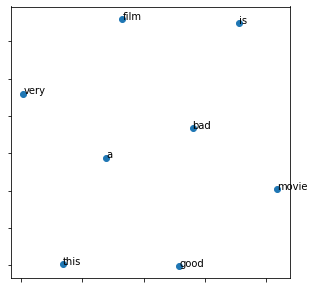

In [29]:
#Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# Problem 5 Corpus pretreatment

In [30]:
x_train_original = x_train.copy()
x_test_original  = x_test.copy()

In [31]:
x_train = x_train_original.copy()
x_test = x_test_original.copy()

In [32]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [33]:
#Corpus pretreatment
def clean_text(text):
  text = re.sub(r"<.*?>", "", text)
  text = re.sub(r"[^\w\s]", "", text, re.UNICODE)
  text = re.sub(r"https?://\S+|www\.\S+", "", text)
  text = text.lower()
  text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
  text = [lemmatizer.lemmatize(token, "v") for token in text]
  text = [re.sub(r"[^\w\s]", "", word) for word in text if not word in stop_words]

  return text

In [34]:
x_train = list(map(clean_text, x_train))
x_test  = list(map(clean_text, x_test))

In [35]:
len(x_train)

25000

# Problem 6 Learning Word2Vec

In [36]:
from gensim.models import Word2Vec

model = Word2Vec(min_count=3 ,size=256, window=5, workers=4)
model.build_vocab(x_train)
model.train(x_train, total_examples=model.corpus_count, epochs=model.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(14047269, 15693860)

# Problem 7 (Advance task) Vector visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


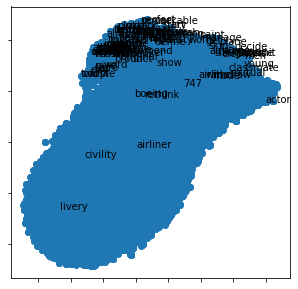

In [37]:
from sklearn.manifold import TSNE
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)[:100]):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [38]:
model.wv.most_similar(positive="look", topn=3)

[('sound', 0.5067599415779114),
 ('seem', 0.5037986040115356),
 ('fast', 0.4689197540283203)]